`labcode.plotter.plot2d_xxxx` plots 2d datas from a dataframe.

You can also do that with `plt.pcolormesh` 
only if you would like to reshape the dataframe into a 2d array.

Here is a simple example.

,x,y,z
0,0,0,1
1,0,1,0
2,0,2,0
3,1,0,0
4,1,1,1
5,1,2,0
6,2,0,1
7,2,1,0
8,2,2,1


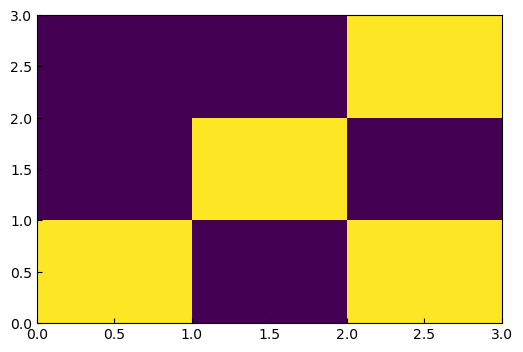

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from labcodes import plotter

df = pd.DataFrame(dict(
    x=[0, 0, 0, 1, 1, 1, 2, 2, 2],
    y=[0, 1, 2, 0, 1, 2, 0, 1, 2],
    z=[1, 0, 0, 0, 1, 0, 1, 0, 1],
))

plt.pcolormesh(df.z.values.reshape(3,3).T)

df

`labcodes` have three different functions doing this.

Just give it the dataframe.

<Axes: title={'center': 'imshow'}>

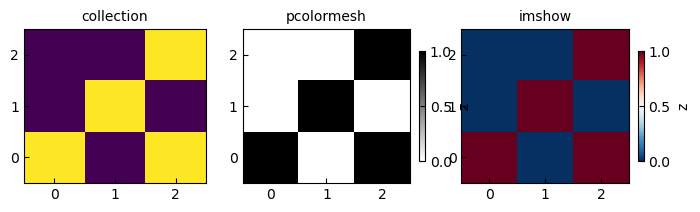

In [8]:
from labcodes import plotter
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2))
ax.set_title('collection')
ax2.set_title('pcolormesh')
ax3.set_title('imshow')
plotter.plot2d_collection(df, ax=ax, colorbar=False, cmap='viridis')
plotter.plot2d_pcolor(df, ax=ax2, cmap='binary')
plotter.plot2d_imshow(df, ax=ax3)

The signatures of them are basically the same.
But each comes with different implementation and restrictions on the data.

They require the x and y coordinates form a grid.

`plot2d_collection` plot each cell as rect: `x_corner, y_corner, width, height.`

`plot2d_pcolor` plot cells in a mesh: `x[i], y[i], x[i+1], y[i+1]...`

`plot2d_imshow` plot colord pixels: `z[i], z[i+1]...`

So obvious `plot2d_imshow` produces smallest figure and is the fastest,
while `plot2d_collection` produces the largest figure and is the slowest.

Besides, there are different restrictions on data, concerning the following three aspects:

- Are the grid points spaced uniformly?

- Is there missing points?

- Is the grid rectangle or not?


,x2,y,z
0,0,0,1
1,0,1,0
2,0,2,0
3,1,0,0
4,1,1,1
5,1,2,0
6,4,0,1
7,4,1,0
8,4,2,1


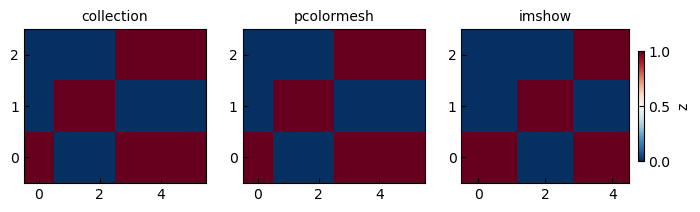

In [9]:
df2 = df.copy()
df2['x2'] = df2['x'] ** 2
df2 = df2[['x2', 'y', 'z']]

from labcodes import plotter
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2))
ax.set_title('collection')
ax2.set_title('pcolormesh')
ax3.set_title('imshow')
plotter.plot2d_collection(df2, ax=ax, colorbar=False)
plotter.plot2d_pcolor(df2, ax=ax2, colorbar=False)
plotter.plot2d_imshow(df2, ax=ax3)

df2

`plot2d_imshow` ignores the irregular grid space.

And `plot2d_pcolor` cannot handle the missing point, because it relays on reshaping the dataframe.

ValueError: cannot reshape array of size 8 into shape (3,newaxis)

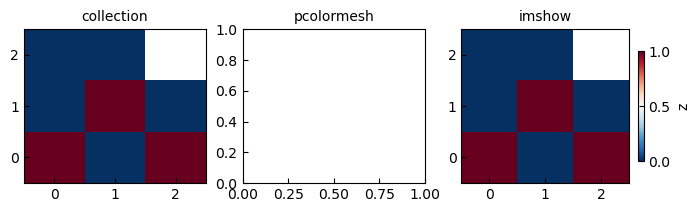

In [10]:
df2 = df.copy()
df2.drop(8, inplace=True)

from labcodes import plotter
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2))
ax.set_title('collection')
ax2.set_title('pcolormesh')
ax3.set_title('imshow')
plotter.plot2d_collection(df2, ax=ax, colorbar=False)
plotter.plot2d_imshow(df2, ax=ax3)
plotter.plot2d_pcolor(df2, ax=ax2, colorbar=False)

You can fix that by manually fill the missing part with `np.nan`

<Axes: title={'center': 'pcolormesh'}>

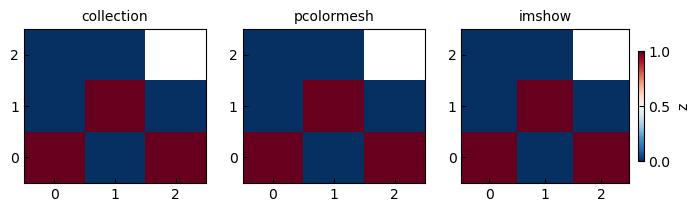

In [11]:
df2 = df.copy()
df2.at[8, 'z'] = np.nan

from labcodes import plotter
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2))
ax.set_title('collection')
ax2.set_title('pcolormesh')
ax3.set_title('imshow')
plotter.plot2d_collection(df2, ax=ax, colorbar=False)
plotter.plot2d_imshow(df2, ax=ax3)
plotter.plot2d_pcolor(df2, ax=ax2, colorbar=False)

both `plot2d_collection` and `plot2d_pcolormesh` accepts quadripartite grid.

<Axes: title={'center': 'imshow'}>

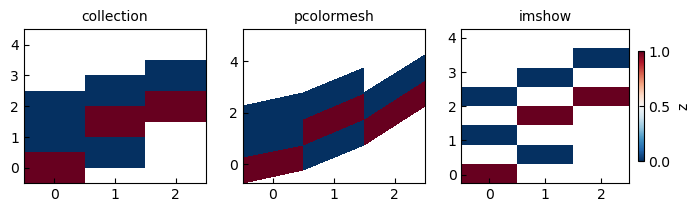

In [15]:
df2 = df.copy()
df2['y2'] = df2['y'] + 0.5 * df2['x'] ** 2
df2 = df2[['x', 'y2', 'z']]
df2.at[8, 'z'] = np.nan

from labcodes import plotter
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2))
ax.set_title('collection')
ax2.set_title('pcolormesh')
ax3.set_title('imshow')
plotter.plot2d_collection(df2, ax=ax, colorbar=False)
plotter.plot2d_pcolor(df2, ax=ax2, colorbar=False)
plotter.plot2d_imshow(df2, ax=ax3)

For irregular grid which is even not quadrilateral, none of them works. 

You may consider 
[contour plot](https://matplotlib.org/stable/gallery/images_contours_and_fields/irregulardatagrid.html#sphx-glr-gallery-images-contours-and-fields-irregulardatagrid-py), 
[2d hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html), 
or scatter plot.

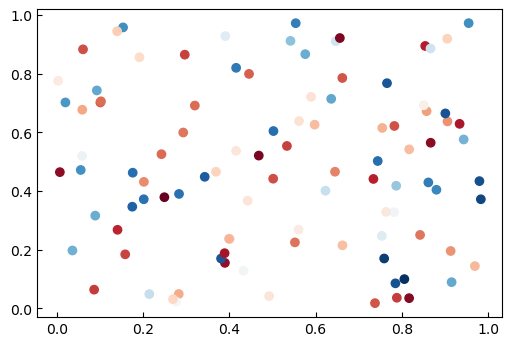

In [17]:
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

plt.scatter(x, y, c=plt.get_cmap('RdBu_r')(z))

# Find divides between data points.

Consider a arbitrary monotonically increasing array,
how to divide the space into segments such that each segment have their center around the data values?

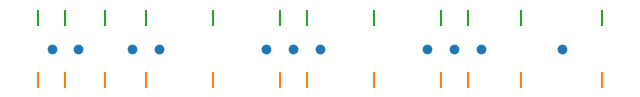

In [18]:
da = np.random.randint(1, 5, 10)
a = np.hstack([[0], np.cumsum(da)])  # An arbitrary array.
assert np.allclose(da, np.diff(a))

# From mpl.pcolormesh.
da2 = da / 2
cut = np.hstack([a[0] - da2[0], a[:-1] + da2, a[-1] + da2[-1]])

# used in previous labcodes.
width = np.gradient(a)
cut2 = (np.hstack([a[0]*2 - a[1], a[:-1]]) + a) / 2
cut2 = np.hstack([cut2, cut2[-1] + width[-1]])

# The method produces the same results.
fig, ax = plt.subplots(figsize=(8, 1))
ax.set_axis_off()
ax.scatter(a, np.zeros_like(a), marker='o')
ax.scatter(cut, -0.05*np.ones_like(cut), 300, marker='|')
ax.scatter(cut2, 0.05*np.ones_like(cut2), 300, marker='|')

Note the data points are not exactly at the centers.